In [1]:
import numpy as np
import cv2 as cv
import os
import skimage.io as io
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from pytest import param

In [2]:
# defining directories for the training and testing data
train_dir = r"Objects_Dataset_Images/train"
test_dir = r"Objects_Dataset_Images/test"

# function to get the paths of all images in a given directory and their corresponding labels
def get_image_paths(directory):
    
    image_paths = []
    image_labels = []   
    for folder in os.listdir(directory):
        path = os.path.join(directory, folder)
        for file in os.listdir(path):
            image_paths.append(os.path.join(path, file))
            image_labels.append(folder)
    return image_paths, image_labels

# get the paths and labels of training and testing images in Object_Dataset_Images
train_image_paths, train_image_labels = get_image_paths(train_dir)
test_image_paths, test_image_labels = get_image_paths(test_dir)

In [3]:
def get_sift_features(image_paths,image_labels, n_features):
    """
    This function takes the paths of images and their corresponding labels and returns the SIFT features of the images
    and a dictionary containing the keypoints and descriptors of each image.
    
    Parameters:
    ------------
    image_paths: list of paths of images
    image_labels: list of labels of images
    n_features: number of features to be extracted from each image
    
    Returns:
    ------------
    features: SIFT features of all images
    dic: dictionary containing the keypoints and descriptors of each image
    """

    #dictionary to store the keypoints and descriptors of each image
    dic = dict.fromkeys(image_paths)
    
    sift = cv.SIFT_create(nfeatures=n_features)
    features = np.empty((1,128))
    keypoints, descriptors = None,None

    # get the SIFT features of each image
    for image_path,label in zip(image_paths,image_labels):
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        keypoints, descriptors = sift.detectAndCompute(image, None)
        features = np.vstack((features, descriptors))
        dic[image_path] = (keypoints, descriptors,label)
    features = np.delete(features,(0),axis=0)
    return features, dic

# get the SIFT features of training and testing images
train_features, train_dic = get_sift_features(train_image_paths,train_image_labels, 10)
test_features, test_dic = get_sift_features(test_image_paths,test_image_labels, 10)

In [4]:
def create_words(features,n_start,n_end,step):
    """
    Creates visual words using KMeans clustering on the given features
    
    Parameters
    -----------
        features: features of the images
        n_start: starting number of clusters
        n_end: ending number of clusters
        step: step size
    Returns
    -----------
        kmeans: list of KMeans objects
        inertia: list of inertia values
    """
    inertia = []
    kmeans = []

    # create KMeans object for each number of clusters
    for i,n in enumerate(range(n_start,n_end,step)):
        kmeans.append(KMeans(n_clusters=n,n_init = 10))
        kmeans[i].fit_predict(features)
        inertia.append(kmeans[i].inertia_)
        print("n_clusters: ", n, "inertia: ", kmeans[i].inertia_)
    return kmeans, inertia

# create visual words using KMeans clustering on training features
kmeans,inertia = create_words(train_features, 10, 101, 10)


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  10 inertia:  51736193.589773364


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  20 inertia:  43927713.553349376


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  30 inertia:  39896198.75448963


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  40 inertia:  36930626.05622517


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  50 inertia:  34235156.23323606


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  60 inertia:  32021809.502845034


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  70 inertia:  30166198.179096717


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  80 inertia:  28678443.781932108


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  90 inertia:  27104234.69908425


c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


n_clusters:  100 inertia:  25724909.378435288


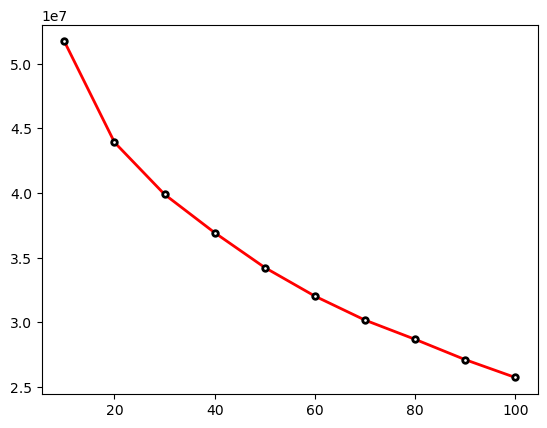

In [5]:
# plot the elbow curve for visualizing the optimal value of K in KMeans clustering
plt.plot(range(10, 101, 10), inertia, '.-', color='red', linewidth=2, markersize=8, markeredgewidth=2,
         markeredgecolor='black', markerfacecolor='white')

In [6]:
def create_histograms(kmeans,n,dic):
  """
  This function takes the KMeans list, the index of the KMeans object to be used and the dictionary
  containing the keypoints and descriptors of each image and returns the histograms of visual words
  for each image and their corresponding labels.
  
  Parameters:
  ------------
  kmeans: list of KMeans objects
  n: index of the KMeans object to be used
  dic: dictionary containing the keypoints and descriptors of each image
  
  Returns:
  ------------
  image_histogram: histograms of visual words for each image
  labels: labels of the images
  """
  image_histogram=[]
  labels = []
  c=kmeans[n].n_clusters
  for image in dic.values():
    labels.append(image[2])
    desc = image[1]
    words = kmeans[n].predict(desc.astype("float"))
    image_desc = np.histogram(words,list(range(c+1)))[0]
    image_histogram.append(image_desc)
  image_histogram = np.array(image_histogram)
  labels = np.array(labels)
  return image_histogram, labels

n=1 #index of kmeans selected from elbow curve
train_histograms , train_labels = create_histograms(kmeans,n,train_dic)
test_histograms , test_labels = create_histograms(kmeans,n,test_dic)

In [7]:
#Random Forest Classifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(train_histograms,train_labels)

#SVM
svm1 = Pipeline([
    ("scaling",StandardScaler()),
    ("svm",LinearSVC())
])
svm1.fit(train_histograms,train_labels)

Pipeline(steps=[('scaling', StandardScaler()), ('svm', LinearSVC())])

In [8]:
pred_y = svm1.predict(test_histograms)
y_pred_rf = rnd_clf.predict(test_histograms)

In [9]:

print(precision_score(test_labels, pred_y, average='macro'),
recall_score(test_labels, pred_y, average='macro'),
f1_score(test_labels, pred_y, average='macro'))

print(precision_score(test_labels, y_pred_rf, average='macro'),
recall_score(test_labels,y_pred_rf, average='macro'),
f1_score(test_labels,y_pred_rf, average='macro')
)

0.3333333333333333 0.5 0.4
0.6666666666666666 0.625 0.6166666666666667


In [17]:
flowers_dir = r"D:\MSAI\CV\Homework\A1\Bag of Visual Words\flower_photos"
f_image_paths,f_image_labels = get_image_paths(flowers_dir)
features, f_dic = get_sift_features(f_image_paths,f_image_labels, 5)
kmeans,inertia = create_words(features, 2, 16, 1)

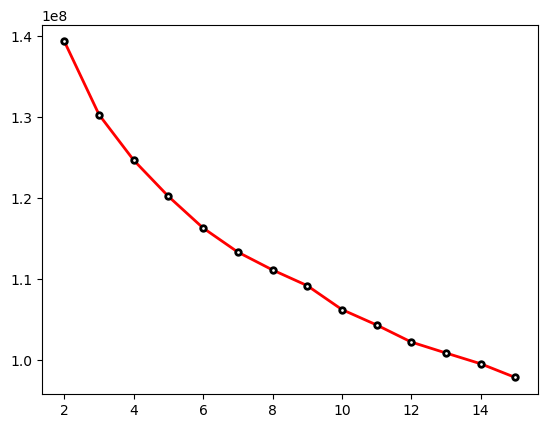

In [ ]:
plt.plot(range(2, 16, 1), inertia, '.-', color='red', linewidth=2, markersize=8, markeredgewidth=2,
         markeredgecolor='black', markerfacecolor='white')

In [ ]:
image_histogram, labels = create_histograms(kmeans,5,f_dic)
train_x, test_x, train_y, test_y = train_test_split(image_histogram, labels, test_size=0.2, random_state=42)

In [ ]:
svm2 = Pipeline([
    ("scaling",StandardScaler()),
    ("svm",LinearSVC())
])
svm2.fit(train_x,train_y)

rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf2.fit(word_count,labels)

c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [ ]:
pred_y = svm2.predict(test_x)
y_pred_rf2 = rnd_clf2.predict(test_x)

In [ ]:
print(precision_score(test_y, pred_y , average='micro'),
recall_score(test_y, pred_y, average='micro'),
f1_score(test_y, pred_y, average='macro'))

print(precision_score(test_y, y_pred_rf2, average='micro'),
recall_score(test_y,y_pred_rf2, average='macro'),
f1_score(test_y,y_pred_rf2, average='macro'))


0.30381471389645776 0.30381471389645776 0.26732614843655045
0.3474114441416894 0.33256222520060985 0.3004383542371747
